In [18]:
!pip install --upgrade pandas-datareader

!pip install pandas-datareader

In [ ]:
!pip install yfinance

# Reading data

Pandas datareader provides a function get_data_yahoo to directly fetch the stock data of the specified stock from Yahoo Finance for the given duration. WE are extracting the Netflix stock price between the duration from 2010-04-01 to 2022-04-25.

In [39]:
import pandas_datareader.data as pdr
import yfinance as yf
yf.pdr_override()
from datetime import datetime

In [40]:
df_netflix = pdr.get_data_yahoo('NFLX', datetime(1970, 1, 1))
df_netflix

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
...,...,...,...,...,...,...
2023-03-13,287.339996,299.239990,285.329987,293.510010,293.510010,6292400
2023-03-14,295.970001,297.450012,290.309998,294.940002,294.940002,5956700
2023-03-15,292.510010,306.309998,292.279999,303.790009,303.790009,9215300


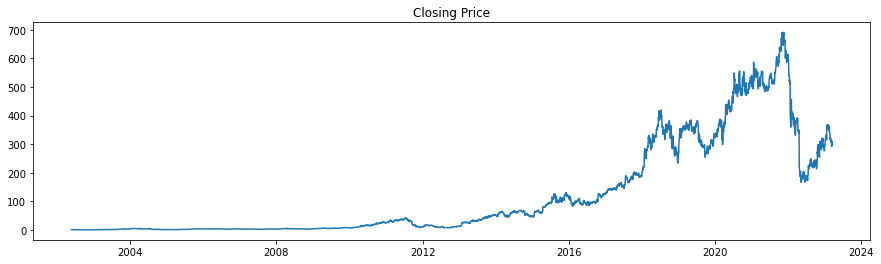

In [24]:
df = df_netflix['Close']
plt.figure(figsize = (15,4))
plt.plot(df)
plt.title("Closing Price")
plt.show()

# Dividing the dataset
Since this is time-series data, we cannot use the scikit-learn train_test_split() function because we need to preserve the order of prices. So, we will use, starting 80% of the values as a training dataset and the rest for testing. We also reshaped the datasets to make them compatible for the next step which is normalization. 

In [25]:
last_index = int(len(df) * 0.8)
train = df[:last_index].values.reshape(-1,1)
test = df[last_index:].values.reshape(-1,1)
train.shape, test.shape

((4192, 1), (1049, 1))

# Normalization
Normalization converts all the values in the range of 0 to 1. It improves convergence and hence reduces training time.

In [26]:
from sklearn.preprocessing import MinMaxScaler
 
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)
train[:10]

array([[0.00196746],
       [0.00199988],
       [0.00187361],
       [0.00174563],
       [0.00166884],
       [0.00168079],
       [0.00180535],
       [0.00177975],
       [0.00184972],
       [0.00193333]])

# Splitting the dataset into X and Y
This function specifies how many previous values must be considered to find out the pattern, in order to predict a price. Accordingly, both, the training and testing datasets are split into X and Y.

In [27]:
def create_dataset(dataset, time_step=1):
  data_X, data_Y = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i + time_step), 0]   
    data_X.append(a)
    data_Y.append(dataset[i + time_step, 0])
  return np.array(data_X), np.array(data_Y)

time_step = 100
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

In [28]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [33]:
from keras.models import Sequential
from keras.layers import Dense
 
model = Sequential([Dense(32, activation='relu', input_shape = [100,]),
                    Dense(16, activation='relu'),
                    Dense(1)])
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.build()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_23 (Dense)            (None, 32)                3232      
                                                                 
 dense_24 (Dense)            (None, 16)                528       
                                                                 
 dense_25 (Dense)            (None, 1)                 17        
                                                                 
Total params: 3,777
Trainable params: 3,777
Non-trainable params: 0
_________________________________________________________________


In [44]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
128/128 [==============================] - 1s 7ms/step - loss: 4.6444e-04 - val_loss: 0.0057
Epoch 2/100
128/128 [==============================] - 1s 7ms/step - loss: 3.6415e-04 - val_loss: 0.0059
Epoch 3/100
128/128 [==============================] - 1s 6ms/step - loss: 3.2476e-04 - val_loss: 0.0061
Epoch 4/100
128/128 [==============================] - 1s 7ms/step - loss: 3.4109e-04 - val_loss: 0.0061
Epoch 5/100
128/128 [==============================] - 1s 7ms/step - loss: 3.1822e-04 - val_loss: 0.0097
Epoch 6/100
128/128 [==============================] - 1s 6ms/step - loss: 3.7212e-04 - val_loss: 0.0051
Epoch 7/100
128/128 [==============================] - 1s 6ms/step - loss: 3.3830e-04 - val_loss: 0.0049
Epoch 8/100
128/128 [==============================] - 1s 6ms/step - loss: 2.8630e-04 - val_loss: 0.0044
Epoch 9/100
128/128 [==============================] - 1s 6ms/step - loss: 2.5739e-04 - val_loss: 0.0043
Epoch 10/100
128/128 [==============================] -

128/128 [==============================] - 1s 9ms/step - loss: 1.1014e-04 - val_loss: 0.0015
Epoch 79/100
128/128 [==============================] - 1s 10ms/step - loss: 9.4874e-05 - val_loss: 0.0017
Epoch 80/100
128/128 [==============================] - 1s 9ms/step - loss: 1.0171e-04 - val_loss: 0.0017
Epoch 81/100
128/128 [==============================] - 1s 7ms/step - loss: 9.2184e-05 - val_loss: 0.0022
Epoch 82/100
128/128 [==============================] - 1s 8ms/step - loss: 9.1350e-05 - val_loss: 0.0025
Epoch 83/100
128/128 [==============================] - 1s 9ms/step - loss: 1.5135e-04 - val_loss: 0.0061
Epoch 84/100
128/128 [==============================] - 1s 8ms/step - loss: 1.2231e-04 - val_loss: 0.0017
Epoch 85/100
128/128 [==============================] - 1s 8ms/step - loss: 8.6748e-05 - val_loss: 0.0015
Epoch 86/100
128/128 [==============================] - 1s 8ms/step - loss: 1.1317e-04 - val_loss: 0.0015
Epoch 87/100
128/128 [==============================] - 1s

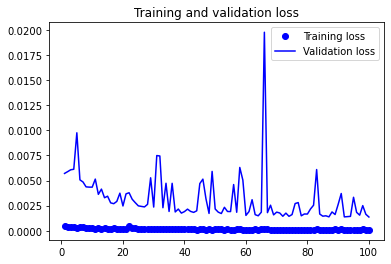

In [45]:
def plot_history(history):
    #acc = history.history['acc']
    #val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    
    epochs = range(1, len(loss) + 1)
    
    #plt.plot(epochs, acc, 'bo', label='Training acc')
    #plt.plot(epochs, val_acc, 'b', label='Validation acc')
    #plt.title('Training and validation accuracy')
    #plt.legend()
    
    plt.figure()
    
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()
plot_history(history)

In [46]:
test_predict = model.predict(X_test)
test_predict[:10]

array([[0.8418368 ],
       [0.83000845],
       [0.8271553 ],
       [0.8155221 ],
       [0.8209669 ],
       [0.83195823],
       [0.8467161 ],
       [0.85809475],
       [0.8741582 ],
       [0.88518983]], dtype=float32)

# Inversing Transformation
Since we normalized the data earlier and converted all the values in the range 0 to 1, now we should inverse the transformation to get actual values. 

In [47]:
test_predict=scaler.inverse_transform(test_predict)

# Visualizing the predictions
Here we have plotted actual and predicted stock prices for the test dataset. We can see that the model is performing fine.

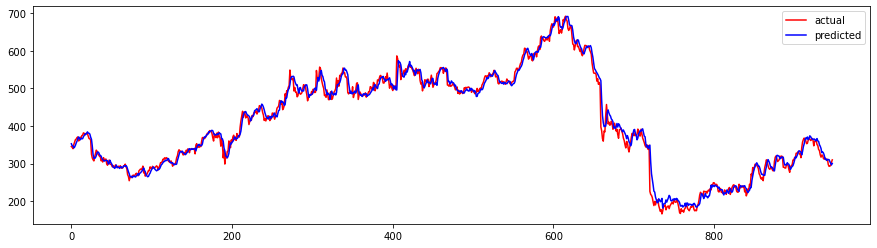

In [48]:
plt.figure(figsize = (15,4))
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)), color = 'r', label = 'actual')
plt.plot(test_predict, color = 'b',label = 'predicted')
plt.legend()
plt.show()

# Evaluating model
For evaluation, we will be using root mean square values.

In [49]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,test_predict, squared = False)

428.1432353154394